# NLP 기초 Assignment
## NLP 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [161]:
# 필요한 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [162]:
spam = pd.read_csv('spam.csv')

In [163]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [164]:
# 특수 문자 제거 및 소문자 변경
import re

def cleantext(data):
    text = re.sub('[^a-zA-Z]', ' ', data).lower()
    return text

spam.v2 = spam.v2.apply(cleantext)

In [165]:
spam.iloc[5]['v2']

'freemsg hey there darling it s been   week s now and no word back  i d like some fun you up for it still  tb ok  xxx std chgs to send         to rcv'

In [166]:
# spam=1, ham=0로 변환
spam.v1 = spam.v1.replace(['ham','spam'], [0,1])
spam

,v1,v2
0,0,go until jurong point crazy available only ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i don t think he goes to usf he lives aro...
...,...,...
5567,1,this is the nd time we have tried contact u...
5568,0,will b going to esplanade fr home
5569,0,pity was in mood for that so any other s...
5570,0,the guy did some bitching but i acted like i d...


In [167]:
spam.info() # null값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [168]:
# 중복 데이터 확인
spam['v2'].nunique()

5147

In [169]:
5572-5169 # 중복값 갯수

403

In [170]:
# 중복 데이터 제거
spam.drop_duplicates(subset=['v2'], inplace=True)
len(spam)

5147

<AxesSubplot:>

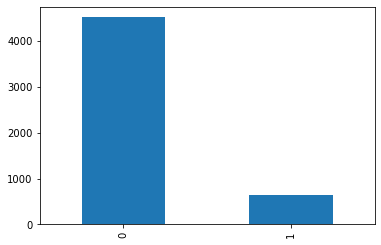

In [171]:
# target값 분포 확인
spam['v1'].value_counts().plot(kind='bar')

## Tokenizing


In [172]:
import nltk

In [173]:
# 예시 코드 코드
from nltk.tokenize import word_tokenize

nltk.download('punkt')
word_tokenize(spam.iloc[5]['v2'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['freemsg',
 'hey',
 'there',
 'darling',
 'it',
 's',
 'been',
 'week',
 's',
 'now',
 'and',
 'no',
 'word',
 'back',
 'i',
 'd',
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'to',
 'send',
 'to',
 'rcv']

In [174]:
# 영어 불용어
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
print(stop_words)

{"didn't", 'some', 'now', 'because', 'being', 'her', 'here', 'below', 'with', 'shan', "mightn't", 'm', "wasn't", 'again', 'most', 'been', "should've", 'by', 'if', 'against', "aren't", 'your', 'can', 'this', 'their', 'an', 'are', 'having', 'ours', 'our', 'don', 'mustn', 'doesn', 'weren', 'there', 'as', 'between', "doesn't", 'theirs', 'that', 'have', 'he', "wouldn't", 'of', 'y', 'ain', 'itself', 'before', 'yourselves', 'not', 'was', 'didn', 'it', 'over', "weren't", 've', 'should', 'after', 'them', 'only', "couldn't", 'from', 'haven', 'too', "you'll", 'aren', "shouldn't", 'how', "you'd", 'who', 'than', 'you', 'what', "hadn't", "needn't", 'just', 'shouldn', "you've", 'those', 'were', 'hadn', "that'll", 'these', 'nor', 'other', 'they', 'into', 'will', "she's", 'had', 'we', 'wasn', 'any', 'more', 'for', 'all', 'is', 'themselves', 'be', 'does', 'or', 'yours', 'off', 'a', 'in', 'mightn', 'i', 's', 'couldn', 'when', "won't", 'during', 'hasn', "you're", 'each', 'such', "shan't", 'she', 'above', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [175]:
# word_tokenize
wd_test = spam.copy()
result = []
for row in wd_test.v2:
        tokenize = word_tokenize(row)
        words = [word for word in tokenize if word not in stop_words]
        result.append(words)

wd_test.v2 = result
wd_test

,v1,v2
0,0,"[go, jurong, point, crazy, available, bugis, n..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"[nah, think, goes, usf, lives, around, though]"
...,...,...
5567,1,"[nd, time, tried, contact, u, u, pound, prize,..."
5568,0,"[b, going, esplanade, fr, home]"
5569,0,"[pity, mood, suggestions]"
5570,0,"[guy, bitching, acted, like, interested, buyin..."


## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText, EMlo가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

### Token 빈도수

In [228]:
from sklearn.feature_extraction.text import CountVectorizer

In [229]:
# ham 빈도수
ct_vector1 = CountVectorizer(max_features=500, stop_words='english', lowercase=False)
corpus_ham = sum(wd_test[wd_test.v1 == 0]['v2'], [])
ct_ham = ct_vector1.fit_transform(corpus_ham)

In [231]:
count_ham = pd.DataFrame({'word' : ct_vector1.get_feature_names(),
                         'count' : ct_ham.sum(axis=0).flat})
count_ham.sort_values('count', ascending=False).head(10)

,word,count
161,gt,288
245,lt,287
298,ok,255
157,got,239
213,know,225
230,like,222
155,good,215
68,come,212
451,ur,198
427,time,192


In [232]:
# spam 빈도수
ct_vector2 = CountVectorizer(max_features=500, stop_words='english', lowercase=False)
corpus_spam = sum(wd_test[wd_test.v1 == 1]['v2'], [])
ct_spam = ct_vector2.fit_transform(corpus_spam)

In [233]:
count_spam = pd.DataFrame({'word' : ct_vector2.get_feature_names(),
                          'count' : ct_spam.sum(axis=0).flat})
count_spam.sort_values('count', ascending=False).head(10)

,word,count
140,free,196
437,txt,141
446,ur,117
395,stop,113
414,text,109
248,mobile,109
344,reply,95
63,claim,92
484,www,83
318,prize,77


### One-hot encoding

In [176]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [177]:
for row in spam.v2:
    tokenizer = Tokenizer()
    text = row
    one_hot_encoding = tokenizer.fit_on_texts([text])
    print('단어 집합 : ', tokenizer.word_index)

단어 집합 :  {'go': 1, 'until': 2, 'jurong': 3, 'point': 4, 'crazy': 5, 'available': 6, 'only': 7, 'in': 8, 'bugis': 9, 'n': 10, 'great': 11, 'world': 12, 'la': 13, 'e': 14, 'buffet': 15, 'cine': 16, 'there': 17, 'got': 18, 'amore': 19, 'wat': 20}
단어 집합 :  {'ok': 1, 'lar': 2, 'joking': 3, 'wif': 4, 'u': 5, 'oni': 6}
단어 집합 :  {'to': 1, 'entry': 2, 'fa': 3, 's': 4, 'free': 5, 'in': 6, 'a': 7, 'wkly': 8, 'comp': 9, 'win': 10, 'cup': 11, 'final': 12, 'tkts': 13, 'st': 14, 'may': 15, 'text': 16, 'receive': 17, 'question': 18, 'std': 19, 'txt': 20, 'rate': 21, 't': 22, 'c': 23, 'apply': 24, 'over': 25}
단어 집합 :  {'u': 1, 'say': 2, 'dun': 3, 'so': 4, 'early': 5, 'hor': 6, 'c': 7, 'already': 8, 'then': 9}
단어 집합 :  {'he': 1, 'nah': 2, 'i': 3, 'don': 4, 't': 5, 'think': 6, 'goes': 7, 'to': 8, 'usf': 9, 'lives': 10, 'around': 11, 'here': 12, 'though': 13}
단어 집합 :  {'it': 1, 's': 2, 'to': 3, 'freemsg': 4, 'hey': 5, 'there': 6, 'darling': 7, 'been': 8, 'week': 9, 'now': 10, 'and': 11, 'no': 12, 'word': 

단어 집합 :  {'you': 1, 'nokia': 2, 'to': 3, 'have': 4, 'won': 5, 'a': 6, 'i': 7, 'this': 8, 'is': 9, 'what': 10, 'get': 11, 'when': 12, 'win': 13, 'our': 14, 'free': 15, 'auction': 16, 'take': 17, 'part': 18, 'send': 19, 'now': 20, 'hg': 21, 'suite': 22, 'lands': 23, 'row': 24, 'w': 25, 'jhl': 26}
단어 집합 :  {'my': 1, 'valentine': 2, 'how': 3, 's': 4, 'it': 5, 'feel': 6, 'mr': 7, 'your': 8, 'not': 9, 'real': 10, 'just': 11, 'yo': 12, 'even': 13, 'tho': 14, 'u': 15, 'hardly': 16, 'play': 17}
단어 집합 :  {'all': 1, 'sounds': 2, 'good': 3, 'fingers': 4, 'makes': 5, 'it': 6, 'difficult': 7, 'to': 8, 'type': 9}
단어 집합 :  {'midnight': 1, 'at': 2, 'the': 3, 'earliest': 4}
단어 집합 :  {'i': 1, 'smoke': 2, 'not': 3, 'to': 4, 'you': 5, 're': 6, 'sure': 7, 'that': 8, 'm': 9, 'trying': 10, 'make': 11, 'xavier': 12, 'because': 13, 'don': 14, 't': 15, 'want': 16, 'after': 17, 'being': 18, 'told': 19, 'too': 20, 'much': 21}
단어 집합 :  {'k': 1, 'come': 2, 'to': 3, 'nordstrom': 4, 'when': 5, 'you': 6, 're': 7, 'done

단어 집합 :  {'i': 1, 'll': 2, 'get': 3, 'there': 4, 'tomorrow': 5, 'and': 6, 'send': 7, 'it': 8, 'to': 9, 'you': 10}
단어 집합 :  {'shit': 1, 'babe': 2, 'thasa': 3, 'bit': 4, 'messed': 5, 'up': 6, 'yeh': 7}
단어 집합 :  {'night': 1, 'a': 2, 'to': 3, 'oh': 4, 'thats': 5, 'late': 6, 'well': 7, 'have': 8, 'good': 9, 'and': 10, 'i': 11, 'will': 12, 'give': 13, 'u': 14, 'call': 15, 'tomorrow': 16, 'iam': 17, 'now': 18, 'going': 19, 'go': 20, 'sleep': 21}
단어 집합 :  {'u': 1, 'cheers': 2, 'tex': 3, 'mecause': 4, 'werebored': 5, 'yeah': 6, 'okden': 7, 'hunny': 8, 'r': 9, 'uin': 10, 'wk': 11, 'sat': 12, 'sound': 13, 's': 14, 'likeyour': 15, 'havin': 16, 'gr': 17, 'fun': 18, 'j': 19, 'keep': 20, 'updat': 21, 'countinlots': 22, 'of': 23, 'loveme': 24, 'xxxxx': 25}
단어 집합 :  {'sorry': 1, 'in': 2, 'meeting': 3, 'i': 4, 'll': 5, 'call': 6, 'you': 7, 'later': 8}
단어 집합 :  {'yo': 1, 'howz': 2, 'u': 3, 'girls': 4, 'never': 5, 'rang': 6, 'after': 7, 'india': 8, 'l': 9}
단어 집합 :  {'yeah': 1, 'but': 2, 'which': 3, 'is': 

단어 집합 :  {'is': 1, 'me': 2, 'too': 3, 'mark': 4, 'taking': 5, 'forever': 6, 'to': 7, 'pick': 8, 'up': 9, 'my': 10, 'prescription': 11, 'and': 12, 'the': 13, 'pain': 14, 'coming': 15, 'back': 16}
단어 집합 :  {'how': 1, 's': 2, 'ur': 3, 'paper': 4}
단어 집합 :  {'got': 1, 'smaller': 2, 'capacity': 3, 'one': 4, 'quite': 5, 'ex': 6}
단어 집합 :  {'check': 1, 'out': 2, 'choose': 3, 'your': 4, 'babe': 5, 'videos': 6, 'sms': 7, 'shsex': 8, 'netun': 9, 'fgkslpopw': 10, 'fgkslpo': 11}
단어 집합 :  {'im': 1, 'good': 2, 'i': 3, 'have': 4, 'been': 5, 'thinking': 6, 'about': 7, 'you': 8}
단어 집합 :  {'a': 1, 'u': 2, 'r': 3, 'winner': 4, 'ave': 5, 'been': 6, 'specially': 7, 'selected': 8, 'receive': 9, 'cash': 10, 'or': 11, 'holiday': 12, 'flights': 13, 'inc': 14, 'speak': 15, 'to': 16, 'live': 17, 'operator': 18, 'claim': 19, 'p': 20, 'min': 21}
단어 집합 :  {}
단어 집합 :  {'st': 1, 'not': 2, 'thought': 3, 'bout': 4, 'it': 5, 'drink': 6, 'in': 7, 'tap': 8, 'spile': 9, 'at': 10, 'seven': 11, 'is': 12, 'that': 13, 'pub': 14,

In [178]:
for row in spam.v2:
    tokenizer = Tokenizer()
    text = row
    one_hot_encoding = tokenizer.fit_on_texts([text])
    encoded = tokenizer.texts_to_sequences([text])
    print(encoded)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
[[1, 2, 3, 4, 5, 6]]
[[5, 2, 6, 7, 8, 9, 1, 10, 3, 11, 12, 13, 14, 15, 16, 3, 1, 1, 17, 2, 18, 19, 20, 21, 22, 23, 4, 24, 25, 4]]
[[1, 3, 2, 4, 5, 6, 1, 7, 8, 9, 2]]
[[2, 3, 4, 5, 6, 1, 7, 8, 9, 1, 10, 11, 12, 13]]
[[4, 5, 6, 7, 1, 2, 8, 9, 2, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 1, 23, 24, 25, 26, 27, 28, 3, 29, 3, 30]]
[[3, 4, 5, 6, 7, 1, 8, 9, 10, 2, 11, 12, 2, 1, 13, 14]]
[[2, 5, 1, 6, 3, 3, 7, 8, 9, 10, 11, 12, 13, 2, 1, 4, 14, 15, 16, 17, 18, 19, 1, 20, 4]]
[[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 13, 14, 15, 1, 2, 16, 2, 17, 18, 19, 20, 21]]
[[6, 7, 1, 8, 9, 10, 11, 12, 13, 2, 3, 2, 4, 14, 15, 16, 17, 18, 19, 5, 20, 4, 1, 3, 21, 5, 22]]
[[1, 2, 3, 4, 5, 6, 7, 1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 1, 19, 20, 21, 22]]
[[2, 3, 1, 4, 5, 6, 1, 7, 8, 9, 10, 11, 1, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
[[2, 3, 4, 5, 1, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 2

[[1, 2, 3, 4, 5, 6, 7, 8, 9]]
[[1, 2, 3, 4, 5]]
[[1, 2, 3, 4, 5]]
[[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 13, 14, 15, 2, 16, 17, 18, 19, 2, 20, 21, 22, 23, 24, 25, 1]]
[[1, 2, 3, 4, 5, 6]]
[[7, 8, 9, 10, 11, 12, 1, 13, 14, 2, 15, 16, 17, 18, 3, 4, 19, 20, 21, 22, 23, 2, 24, 25, 26, 1, 5, 6, 27, 28, 29, 30, 1, 5, 6, 4, 3, 31, 32, 33, 34, 35, 36]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
[[1, 2, 3, 4, 5, 6, 7, 8]]
[[2, 1, 3, 4, 1, 5, 6, 7, 8, 9, 10, 1, 11, 12, 13, 14, 15]]
[[2, 3, 1, 4, 5, 6, 7, 8, 1, 9, 10, 11]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
[[2, 3, 1, 4, 5, 6, 1, 7, 8, 9, 10, 11]]
[[1, 2, 3, 4, 5, 6]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
[[1, 2, 3, 4, 5, 1, 6, 7, 8, 9, 10, 11]]
[[4, 1, 5, 2, 6, 2, 7, 8, 9, 1, 3, 10, 11, 12, 1, 3, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[4, 5, 6, 1, 7, 8, 9, 10, 2, 11, 12, 2, 13, 3, 14, 15, 16, 17, 18, 1, 19, 1, 20, 21, 22, 3, 23, 24, 25, 26]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
[[1, 2, 3]]
[[4, 5, 6, 

[[4, 5, 6, 7, 1, 8, 9, 10, 1, 11, 12, 13, 2, 3, 14, 15, 2, 16, 17, 3, 18, 19, 20, 21, 22, 23, 24]]
[[1, 2, 3, 4, 5]]
[[2, 4, 1, 5, 6, 7, 8, 9, 10, 2, 1, 3, 11, 12, 13, 14, 15, 16, 1, 17, 3]]
[[1, 2, 3, 4, 5, 6, 7, 8]]
[[1, 2, 3, 4, 5]]
[[2, 3, 4, 1, 5, 6, 7, 8, 9, 1, 10]]
[[1, 2, 3, 4, 5]]
[[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1, 15, 16, 17, 18, 2, 19, 20, 21, 1, 22, 23, 24, 25, 2, 26, 27, 28, 1, 29, 30]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
[[1, 2, 3, 4, 5, 6, 7]]
[[1, 2, 3, 4, 5]]
[[1, 2, 3, 4, 5, 6, 7]]
[[1, 2, 3, 4, 5, 6]]
[[3, 4, 2, 5, 6, 7, 1, 8, 9, 10, 1, 11, 12, 2, 13, 14, 15, 16, 1, 17, 18, 19, 20, 1]]
[[1, 2, 3, 4, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]]
[[2, 3, 4, 5, 6, 1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]]
[[1, 2, 3, 4, 5, 6, 7, 8]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]]
[[1, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 11, 12, 13, 14, 15, 16, 17, 18, 2, 19, 20, 21, 22, 23, 2

[[4, 5, 6, 7, 8, 9, 10, 11, 1, 12, 13, 14, 15, 2, 16, 3, 17, 2, 1, 3, 18, 19]]
[[5, 1, 6, 1, 7, 3, 3, 8, 9, 10, 2, 11, 1, 12, 13, 14, 15, 16, 17, 2, 18, 4, 19, 20, 2, 21, 22, 4, 23, 24, 25, 26, 27]]
[[1, 2, 3, 4, 5, 6, 7, 8]]
[[1, 2, 3, 4, 5, 6, 7]]
[[1, 3, 4, 1, 5, 6, 7, 8, 9, 1, 10, 11, 12, 2, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 2, 26, 27]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]
[[2, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 1, 14, 15]]
[[1, 5, 6, 7, 1, 3, 4, 2, 8, 2, 3, 9, 4, 10, 11, 2, 12, 13, 14, 1, 15, 16, 17]]
[[1, 2, 3, 4, 5, 6]]
[[3, 4, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 1, 13, 14, 15, 16, 17, 18, 19, 2, 20, 21, 1, 22, 23, 24]]
[[1, 3, 4, 5, 6, 2, 1, 7, 8, 2, 9]]
[[1, 2, 3, 4, 5, 6, 7, 8]]
[[3, 4, 5, 6, 1, 7, 8, 9, 2, 10, 11, 12, 1, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 2, 27, 28, 29, 30]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]
[[2, 3, 4, 5, 6, 7, 8, 9, 1, 10, 1, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
[[1, 2, 3, 4, 5, 6, 7, 8]]


[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
[[1, 2, 3, 4, 5, 6, 7]]
[[1, 2, 3, 4, 5, 6, 7, 8]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
[[2, 1, 3, 4, 1, 5, 6, 7, 8, 9, 10, 11, 12]]
[[2, 3, 7, 1, 4, 5, 6, 8, 9, 10, 11, 1, 12, 13, 6, 14, 2, 3, 15, 1, 4, 16, 5, 17, 18, 19]]
[[1, 2, 3, 4, 5]]
[[2, 3, 4, 5, 6, 7, 1, 8, 9, 10, 1, 11, 12, 13, 14, 15]]
[[1, 2, 3, 4, 5]]
[[1, 2, 3, 4, 5, 6]]
[[1, 2, 3, 4, 5, 6]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]]
[[1, 2, 3, 4, 5]]
[[1, 2, 3, 4, 5, 6]]
[[3, 1, 4, 2, 5, 1, 2, 6]]
[[2, 3, 1, 4, 5, 6, 7, 8, 1, 9, 10, 11, 12, 13, 1, 14, 15, 16, 17, 18, 19, 20]]
[[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 13, 14, 1, 15]]
[[1, 2, 3, 4, 5, 6, 7]]
[[1, 1, 2, 3, 4, 5, 6]]
[[5, 1, 2, 6, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1, 2, 16, 17, 3, 4, 18, 19, 20, 21, 22]]
[[1, 2, 3, 4, 5]]
[[1, 2, 3, 4, 5, 6, 7]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]]

[[1, 2, 3]]
[[2, 3, 4, 5, 6, 1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1, 16, 17, 18, 19, 20, 21, 22]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
[[3, 1, 4, 5, 6, 2, 7, 8, 9, 10, 11, 12, 13, 14, 15, 2, 16, 1, 17, 18, 19, 20, 21, 22, 23, 24]]
[[1, 2, 3, 4, 5, 6, 7, 8]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
[[2, 3, 4, 5, 1, 6, 7, 8, 1, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 10, 11, 12, 13, 14]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]
[[1, 2, 3, 4, 5]]
[[1, 2, 3]]
[[1, 2, 3, 4, 5, 6, 7, 8]]
[[1, 2, 1, 3]]
[[2, 3, 1, 4, 5, 6, 1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1, 16]]
[[2, 3, 4, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 1, 23, 24]]
[[1, 2, 3, 4, 5, 1, 6, 7, 8, 9, 10, 11]]
[[1, 2, 3, 4, 5]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
[[1, 2, 3, 4, 5, 6]]
[[3, 4, 5, 6, 7, 1, 8, 2, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 

In [179]:
for row in spam.v2:
    tokenizer = Tokenizer()
    text = row
    one_hot_encoding = tokenizer.fit_on_texts([text])
    encoded = tokenizer.texts_to_sequences([text])
    one_hot = to_categorical(encoded)
    print(one_hot)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.

  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]]
[[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1.]]]
[[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]]
[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]]
[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

[[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0.]
  [0. 0. 0. 0. 0

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0.

[[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 

[[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.

[[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]]
[[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]]
[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

[[[0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 1. 0.]
  [0. 0. 0. ... 0. 0. 1.]]]
[[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]]
[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0

[[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.

[[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

ValueError: zero-size array to reduction operation maximum which has no identity

단어의 개수가 늘어날수록, 벡터를 저장하기 위해 필요한 공간이 계속 늘어난다는 단점이 있음. 벡터의 차원이 커지기에 저장 공간 측면에서 매우 비효율적임.

단어의 유사도를 표현하지 못한다는 단점 또한 있음.

### Word2Vec(Skip-gram)

In [187]:
# spam 학습
model_sg = Word2Vec(wd_test[wd_test.v1 == 1]['v2'], min_count=5, window=2, sg=1)

In [188]:
model_sg.save('w2v_model_spam')

In [189]:
w2v_model_spam = Word2Vec.load('w2v_model_spam')

In [190]:
w2v_model_spam.wv.doesnt_match('free txt ut stop mobile text claim reply www prize'.split())

'prize'

In [191]:
w2v_model_spam.wv.most_similar('free')

[('mobile', 0.9981974363327026),
 ('latest', 0.9981370568275452),
 ('www', 0.998100221157074),
 ('txt', 0.9980810880661011),
 ('nokia', 0.9980749487876892),
 ('get', 0.9980326294898987),
 ('week', 0.9980225563049316),
 ('p', 0.9980050921440125),
 ('win', 0.9979871511459351),
 ('ur', 0.9979846477508545)]

In [192]:
w2v_model_spam.wv.most_similar(positive=['free', 'prize'], negative=['ok'], topn=10)

[('please', 0.9893026351928711),
 ('txt', 0.9886069297790527),
 ('u', 0.9885256886482239),
 ('ppm', 0.9885161519050598),
 ('mths', 0.9885129928588867),
 ('call', 0.9884471893310547),
 ('line', 0.988446056842804),
 ('ts', 0.9884287714958191),
 ('ipod', 0.988405704498291),
 ('messages', 0.9883934259414673)]

In [193]:
# ham 학습
model_sg2 = Word2Vec(wd_test[wd_test.v1 == 0]['v2'], min_count=5, window=2, sg=1)

In [194]:
model_sg2.save('w2v_model_ham')

In [195]:
w2v_model_ham = Word2Vec.load('w2v_model_ham')

In [198]:
w2v_model_ham.wv.doesnt_match('gt lt ok got know like good come ur time'.split())

'gt'

In [199]:
w2v_model_ham.wv.most_similar('ok')

[('someone', 0.9984170198440552),
 ('nothing', 0.9983758926391602),
 ('name', 0.9983472228050232),
 ('missed', 0.9983037114143372),
 ('r', 0.9982982873916626),
 ('told', 0.9982891082763672),
 ('heart', 0.9982814192771912),
 ('ill', 0.9982331395149231),
 ('problem', 0.998221755027771),
 ('trying', 0.9982137084007263)]

In [200]:
w2v_model_ham.wv.most_similar(positive=['ok','like'], negative=['free'], topn=10)

[('missed', 0.9969358444213867),
 ('afternoon', 0.9968284368515015),
 ('another', 0.996775209903717),
 ('left', 0.9967290759086609),
 ('years', 0.9966112375259399),
 ('school', 0.9965639114379883),
 ('working', 0.9965617060661316),
 ('long', 0.996550440788269),
 ('sent', 0.996544361114502),
 ('pay', 0.996532142162323)]

### CBOW

In [ ]:
#pip install --upgrade gensim

In [201]:
from gensim.models import Word2Vec

In [202]:
# spam 학습
model_cbow = Word2Vec(wd_test[wd_test.v1 == 1]['v2'], min_count=5, window=2, sg=0)

In [203]:
model_cbow.save('w2v_model2_spam')

In [204]:
w2v_model2_spam = Word2Vec.load('w2v_model2_spam')

In [205]:
w2v_model2_spam.wv.doesnt_match("free txt ut stop mobile text claim reply www prize".split())

'reply'

In [206]:
w2v_model2_spam.wv.most_similar('free')

[('call', 0.9906867742538452),
 ('u', 0.9885687232017517),
 ('www', 0.9885144829750061),
 ('mobile', 0.9881789088249207),
 ('txt', 0.9880949854850769),
 ('p', 0.9872375130653381),
 ('cash', 0.9863828420639038),
 ('nokia', 0.9856132864952087),
 ('claim', 0.9852078557014465),
 ('stop', 0.9850535988807678)]

In [207]:
# ham 학습
model_cbow2 = Word2Vec(wd_test[wd_test.v1 == 0]['v2'], min_count=5, window=2, sg=0)

In [208]:
model_cbow2.save('w2v_model2_ham')

In [209]:
w2v_model2_ham = Word2Vec.load('w2v_model2_ham')

In [210]:
w2v_model2_ham.wv.doesnt_match('gt lt ok got know like good come ur time'.split())

'gt'

In [211]:
w2v_model2_ham.wv.most_similar('ok')

[('go', 0.9993758797645569),
 ('u', 0.9993436336517334),
 ('n', 0.9993315935134888),
 ('got', 0.9993072748184204),
 ('send', 0.9993042349815369),
 ('get', 0.9992801547050476),
 ('need', 0.9992777705192566),
 ('ur', 0.9992763996124268),
 ('time', 0.9992645382881165),
 ('well', 0.9992427229881287)]

**spam**
1. skip-gram

    * spam 빈도수 상위 10개 단어 중 가장 유사하지 않은 단어 : `gt`
    * `free`와 가장 유사한 단어 :

    [('mobile', 0.9981974363327026),
    
     ('latest', 0.9981370568275452),
     
     ('www', 0.998100221157074),
     
     ('txt', 0.9980810880661011),
     
     ('nokia', 0.9980749487876892),
     
     ('get', 0.9980326294898987),
     
     ('week', 0.9980225563049316),
     
     ('p', 0.9980050921440125),
     
     ('win', 0.9979871511459351),
     
     ('ur', 0.9979846477508545)]
     
2. CBOW

    * spam 빈도수 상위 10개 단어 중 가장 유사하지 않은 단어 : `reply`
    * `free`와 가장 유사한 단어 :
    
    [('call', 0.9906867742538452),
    
    ('u', 0.9885687232017517),
    
    ('www', 0.9885144829750061),
    
    ('mobile', 0.9881789088249207),
    
    ('txt', 0.9880949854850769),
    
    ('p', 0.9872375130653381),
    
    ('cash', 0.9863828420639038),
    
    ('nokia', 0.9856132864952087),
    
    ('claim', 0.9852078557014465),
    
    ('stop', 0.9850535988807678)]

* spam의 빈도수 상위 10개 단어 중 가장 유사하지 않은 단어로 skip-gram은 `prize`, CBOW는 `reply`를 뽑았는데, 상과 관련된 단어들은 스팸 메일에 있을 확률이 높기 때문에 CBOW의 결과가 더 신뢰있다 할 수 있음.

**ham**
1. skip-gram

    * ham 빈도수 상위 10개 단어 중 가장 유사하지 않은 단어 : `prize`
    * `ok`와 가장 유사한 단어 :
    
    [('someone', 0.9984170198440552),
    
    ('nothing', 0.9983758926391602),
    
    ('name', 0.9983472228050232),
    
    ('missed', 0.9983037114143372),
    
    ('r', 0.9982982873916626),
    
    ('told', 0.9982891082763672),
    
    ('heart', 0.9982814192771912),
    
    ('ill', 0.9982331395149231),
    
    ('problem', 0.998221755027771),
    
    ('trying', 0.9982137084007263)]
    
2. CBOW

    * ham 빈도수 상위 10개 단어 중 가장 유사하지 않은 단어 : `gt`
    * `ok`와 가장 유사한 단어 :
    
    [('go', 0.9993758797645569),
    
    ('u', 0.9993436336517334),
    
    ('n', 0.9993315935134888),
    
    ('got', 0.9993072748184204),
    
    ('send', 0.9993042349815369),
    
    ('get', 0.9992801547050476),
    
    ('need', 0.9992777705192566),
    
    ('ur', 0.9992763996124268),
    
    ('time', 0.9992645382881165),
    
    ('well', 0.9992427229881287)]

* ham의 빈도수 상위 10개 단어 중 가장 유사하지 않은 단어로 skip-gram은 `gt`, CBOW는 `gt`를 뽑았는데, 결과가 똑같이 도출되었음.

### FastText

In [212]:
from gensim.models import FastText

In [214]:
# spam
fast_model = FastText(wd_test[wd_test.v1 == 1]['v2'], window=5, min_count=5, workers=4, sg=1)

In [215]:
fast_model.wv.most_similar('free')

[('phones', 0.9997327923774719),
 ('spree', 0.9997217655181885),
 ('freemsg', 0.9997193217277527),
 ('mob', 0.9997000098228455),
 ('phone', 0.9996964931488037),
 ('ringtone', 0.9996481537818909),
 ('mobiles', 0.9996469020843506),
 ('reply', 0.9996299743652344),
 ('motorola', 0.9996208548545837),
 ('ringtones', 0.9996161460876465)]

* 주로 핸드폰, 핸드폰 기종과 관련된 단어들이 많이 도출되었음. Word2Vec보다 결과들이 핸드폰이라는 주제와 연관되어 있고, similar 점수도 0.999이상의 높은 점수를 띄고 있어 Word2Vec보다 신빙성 있어 보임.

In [216]:
# ham
fast_model2 = FastText(wd_test[wd_test.v1 == 0]['v2'], window=5, min_count=5, workers=4, sg=1)

In [217]:
fast_model2.wv.most_similar('ok')

[('eat', 0.9993830323219299),
 ('already', 0.9993187785148621),
 ('goin', 0.9992976784706116),
 ('meeting', 0.9992711544036865),
 ('lunch', 0.999252200126648),
 ('leh', 0.9992233514785767),
 ('quite', 0.999215304851532),
 ('got', 0.9992020130157471),
 ('dunno', 0.9991998672485352),
 ('ah', 0.9991990327835083)]

* 점심, 약속 등과 관련된 단어들이 ok와 유사함을 직관적으로 알 수 있기에 Word2Vec보다 신빙성 있어 보임.

따라서 **FastText**를 사용하기로 함.

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

### 유사도

In [218]:
fast_model.wv.most_similar('free')

[('phones', 0.9997327923774719),
 ('spree', 0.9997217655181885),
 ('freemsg', 0.9997193217277527),
 ('mob', 0.9997000098228455),
 ('phone', 0.9996964931488037),
 ('ringtone', 0.9996481537818909),
 ('mobiles', 0.9996469020843506),
 ('reply', 0.9996299743652344),
 ('motorola', 0.9996208548545837),
 ('ringtones', 0.9996161460876465)]

핸드폰 요금, 핸드폰 기종과 관련되어 무료라고 홍보하는 스팸 메일이 많음.

In [219]:
fast_model.wv.most_similar('stop')

[('unsubscribe', 0.9998183846473694),
 ('getzed', 0.9997566342353821),
 ('store', 0.9997564554214478),
 ('enjoy', 0.9997561573982239),
 ('subscription', 0.999748945236206),
 ('unsub', 0.9997450709342957),
 ('charity', 0.9997437596321106),
 ('themob', 0.9997428059577942),
 ('choose', 0.9997353553771973),
 ('msgs', 0.9997344017028809)]

스팸 메일을 거절하겠냐고 묻는 내용이 있기에 구독과 관련된 단어들이 많이 나옴.

In [220]:
fast_model.wv.most_similar('prize')

[('guaranteed', 0.9996576905250549),
 ('caller', 0.9996255040168762),
 ('call', 0.9995896816253662),
 ('valid', 0.9995631575584412),
 ('attempt', 0.9995558857917786),
 ('shows', 0.9995517730712891),
 ('bonus', 0.9995458126068115),
 ('contact', 0.9994827508926392),
 ('claim', 0.9994736313819885),
 ('line', 0.999426543712616)]

로또, 복권과 같이 상품으로 유인하는 스팸이 많기에 guaranteed, bonus와 같은 단어가 많이 보임.

결론적으로 종합해보자면
1. 핸드폰 관련 홍보 메일
2. 구독 중지에 대해 물어보는 메일
3. 상품 당첨과 관련한 메일

이 스팸 메일일 확률이 높음.

### Wordcloud

In [224]:
#pip install wordcloud

In [225]:
from wordcloud import WordCloud

In [227]:
wc = WordCloud(background_color='white', max_words=80, width=400, height=300)

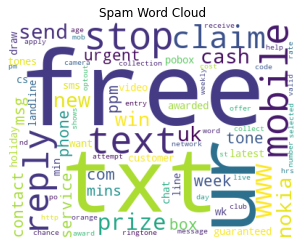

In [236]:
plt.title('Spam Word Cloud')
count_dic = dict(zip(count_spam['word'], count_spam['count']))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)

* `free`, `prize`, `cash`와 같이 보상과 관련된 내용
* `stop`와 같이 거절과 관련된 내용
* `mobile`, `nokia`, `phone`과 같이 휴대폰과 관련된 내용

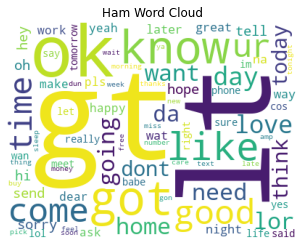

In [235]:
plt.title('Ham Word Cloud')
count_dic = dict(zip(count_ham['word'], count_ham['count']))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)

* `good`, `ok`, `like`, `love`와 같이 긍정적인 감정과 관련된 내용

대부분 사람의 감정과 관련된 내용임.